# Практика 1. Первичный анализ данных с использованием описательных статистик и визуализации

In [1]:
import os
from pandas import read_csv
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## Посмотрим на данные

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

In [3]:
# View first 20 rows
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
peek = data.head(20)
print(peek)

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

## Размерность данных

In [4]:
# Dimensions of your data
shape = data.shape
print(shape)

(768, 9)


## Типы данных

In [5]:
# Data Types for Each Attribute
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Распределение данных по классам

In [7]:
# Class Distribution
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


## Описательные статистики

In [8]:
set_option('display.width', 100)
set_option('precision', 3)

In [9]:
# Statistical Summary
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


## Ассиметрия одномерных распределений

In [10]:
# Skew for each attribute
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


In [11]:
data.kurtosis()

preg     0.159
plas     0.641
pres     5.180
skin    -0.520
test     7.214
mass     3.290
pedi     5.595
age      0.643
class   -1.601
dtype: float64

## Корреляция между признаками

In [12]:
# Pairwise Pearson correlations
correlations = data.corr(method='pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


In [13]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(data.preg,data.plas)
pearson_coef, p_value

(0.12945867149927248, 0.00032194913520398817)

## Univariate Plots (одномерные графики распределений)

### Histograms (гистограммы)

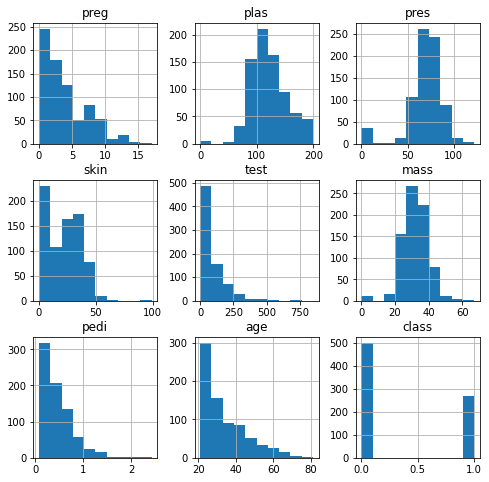

In [14]:
# Univariate Histograms
data.hist(figsize=(8,8))
plt.show()

### Density Plots (ядерные оценки плотности)

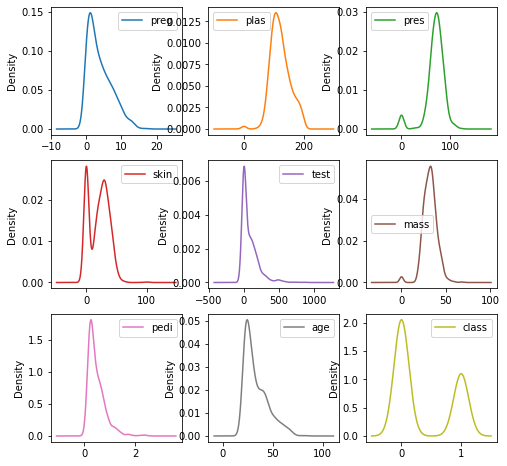

In [25]:
# Univariate Density Plots
data.plot(kind='kde', subplots=True, layout=(3,3), sharex=False,figsize=(8,8))
plt.show()

### Box and Whisker Plots (ящики с усами)

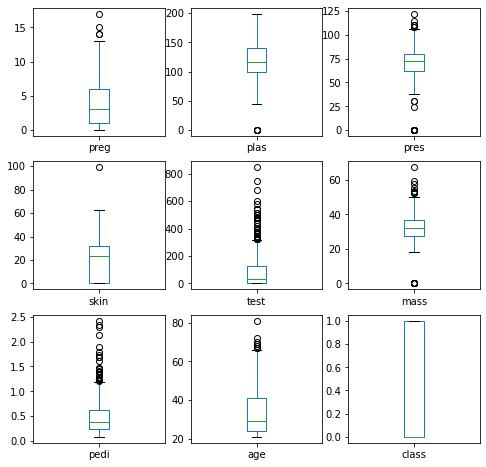

In [23]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))
plt.show()

## Multivariate Plots (многомерные графики распределений)

### Correlation Matrix Plot (коррелограмма)

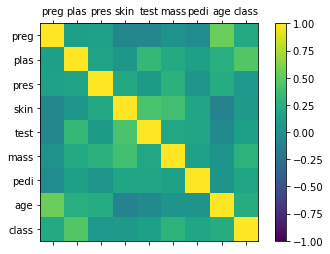

In [17]:
# Correlation Matrix Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

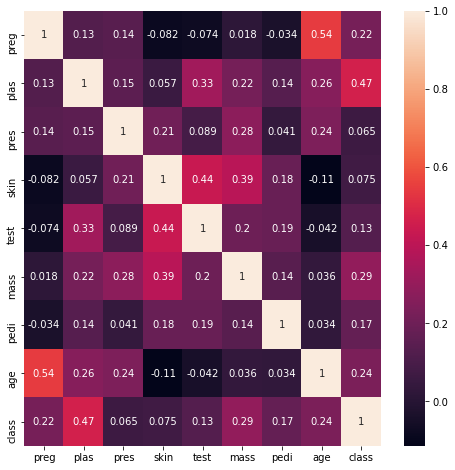

In [28]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

### Scatter Plot Matrix (диаграмма рассеяния)

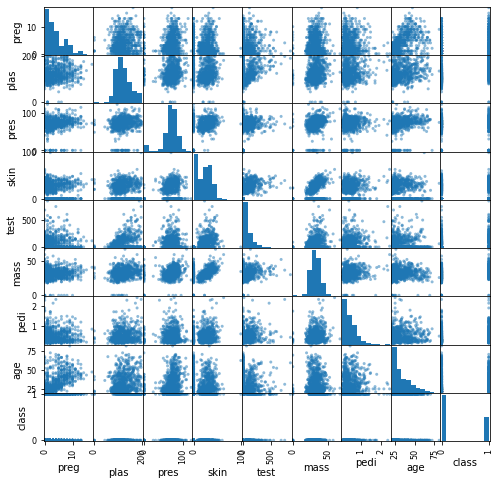

In [20]:
# Scatterplot Matrix
scatter_matrix(data,figsize=(8,8))
plt.show()